In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

In [5]:
## Please load test dataset and perform same operatins on it

In [5]:
# Load dataset

data = pd.read_csv('data/train.csv')
data = pd.read_csv('data/test.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
# Print Dimensions of the dataset
print(data.shape)

(5681, 11)


In [8]:
# Summary of the dataset
data.info()
data.isnull()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [9]:
# check for duplicate values

duplicate = data.duplicated().sum()
print(f"Number of duplicate entries: {duplicate}")

Number of duplicate entries: 0


## Univariant Analysis

The column 'item_outlet_sale' does not exist in the DataFrame.


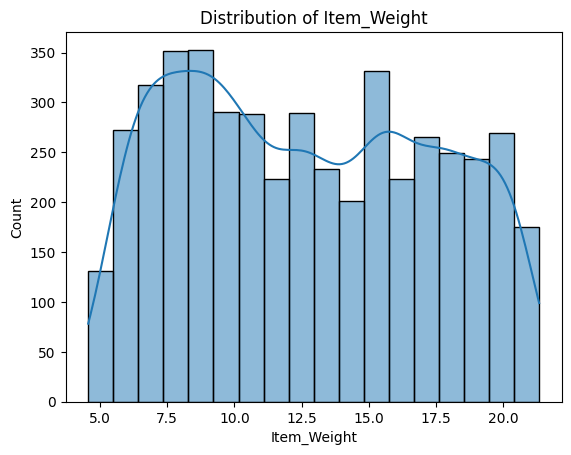

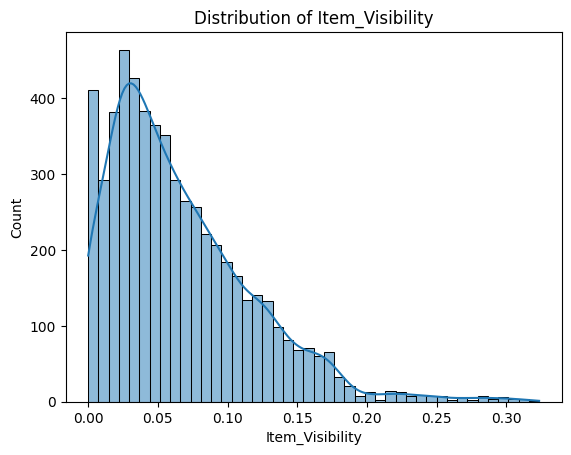

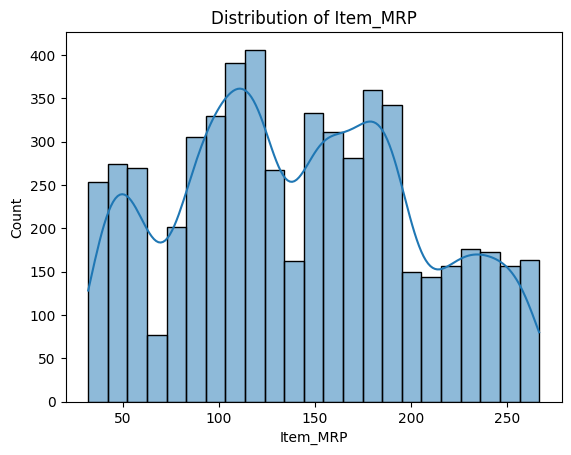

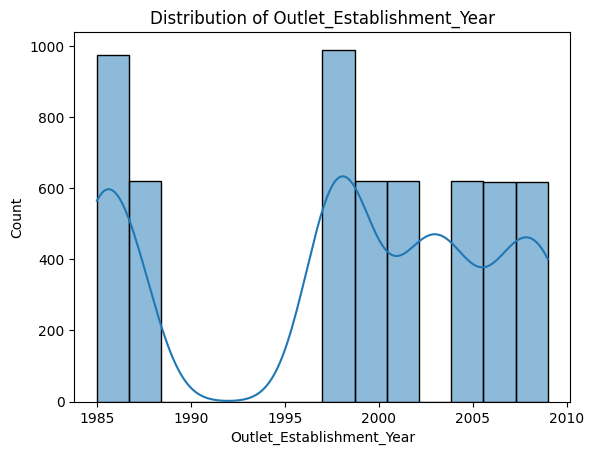

In [10]:
# Distribution of Target Variable
target_column = 'item_outlet_sale'
if target_column in data.columns:
    sns.histplot(data['item_outlet_sales'], kde=True)
    plt.show()
else:
    print(f"The column '{target_column}' does not exist in the DataFrame.")
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['int64','float64']).columns

# Check the distribution of the rest of the numerical features
for feature in numerical_features:
    if feature != 'item_outlet_sales':  # exclude target variable
        sns.histplot(data[feature].dropna(), kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

Count of Item_Identifier:
Item_Identifier
FDQ60    8
NCS41    8
FDW10    8
DRF48    8
FDN52    8
        ..
NCM07    1
FDT40    1
NCI29    1
FDP28    1
FDF04    1
Name: count, Length: 1543, dtype: int64


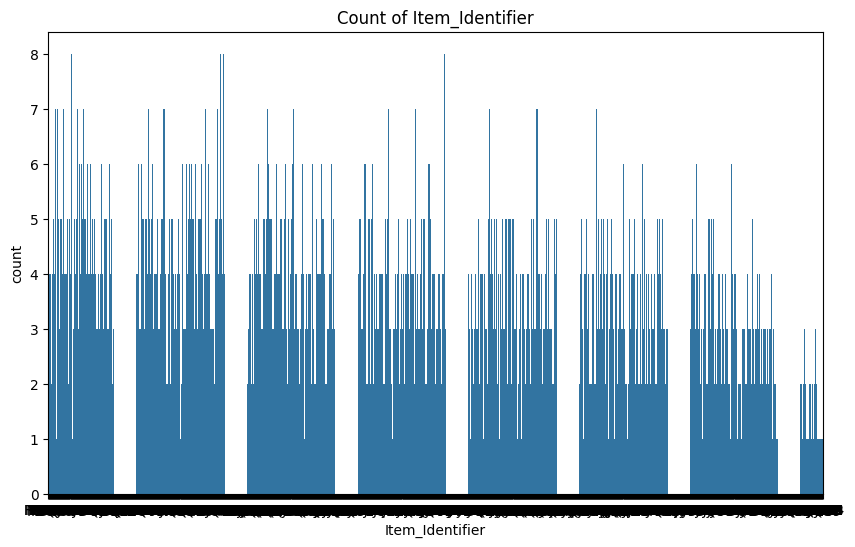



Count of Item_Fat_Content:
Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64


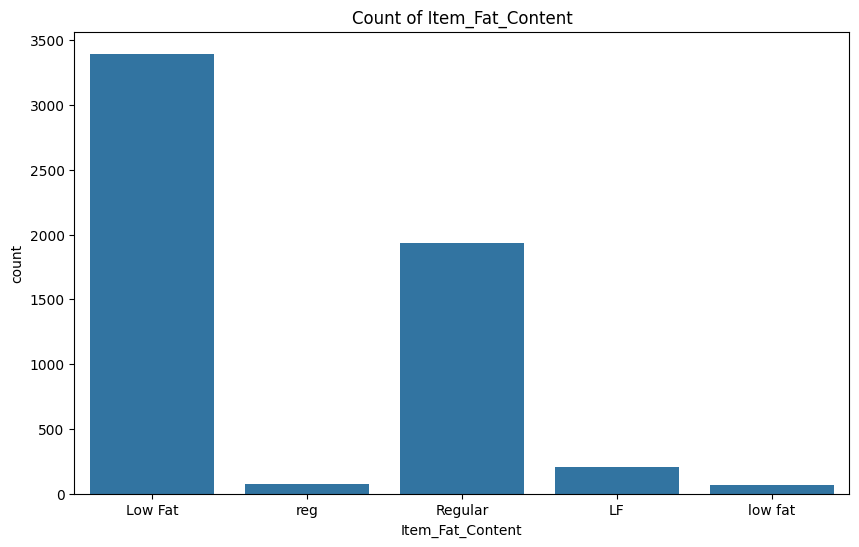



Count of Item_Type:
Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64


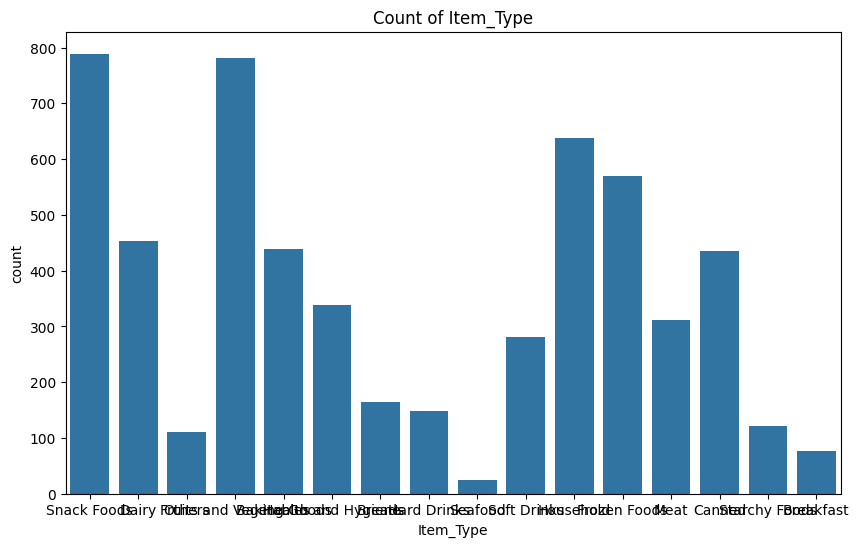



Count of Outlet_Identifier:
Outlet_Identifier
OUT027    624
OUT013    621
OUT035    620
OUT049    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: count, dtype: int64


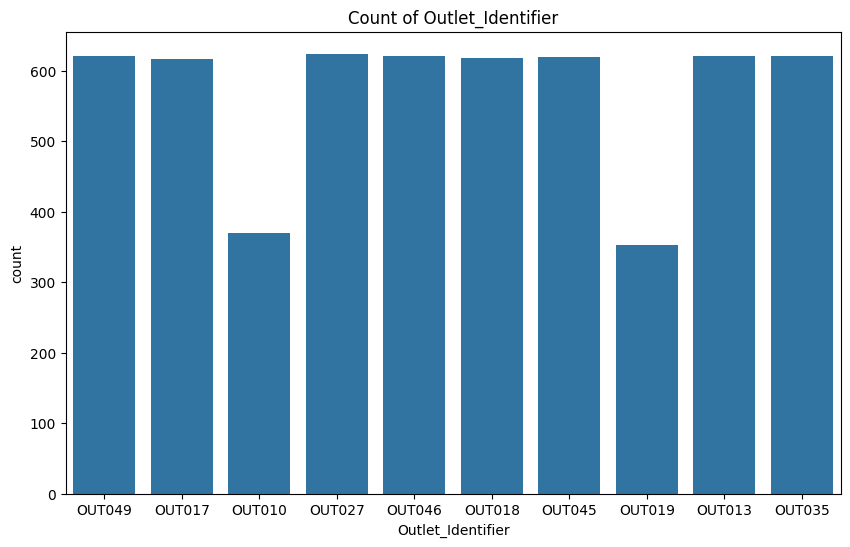



Count of Outlet_Size:
Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64


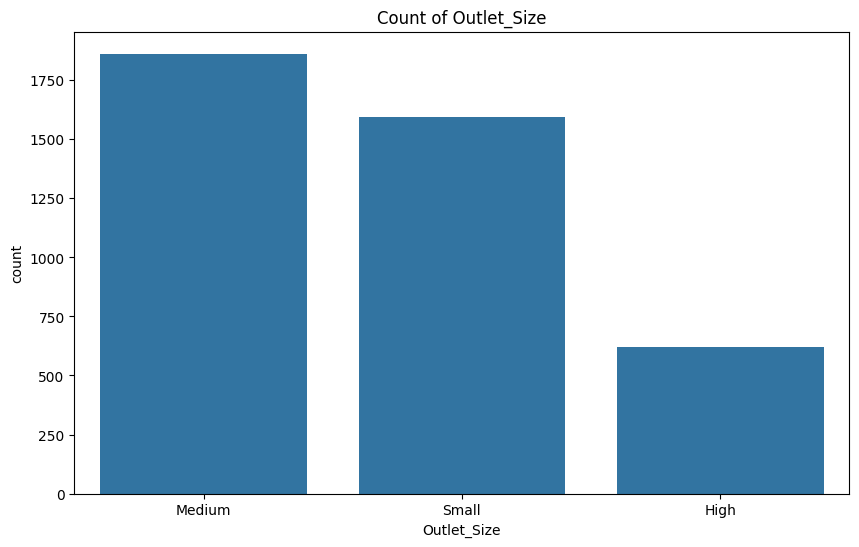



Count of Outlet_Location_Type:
Outlet_Location_Type
Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: count, dtype: int64


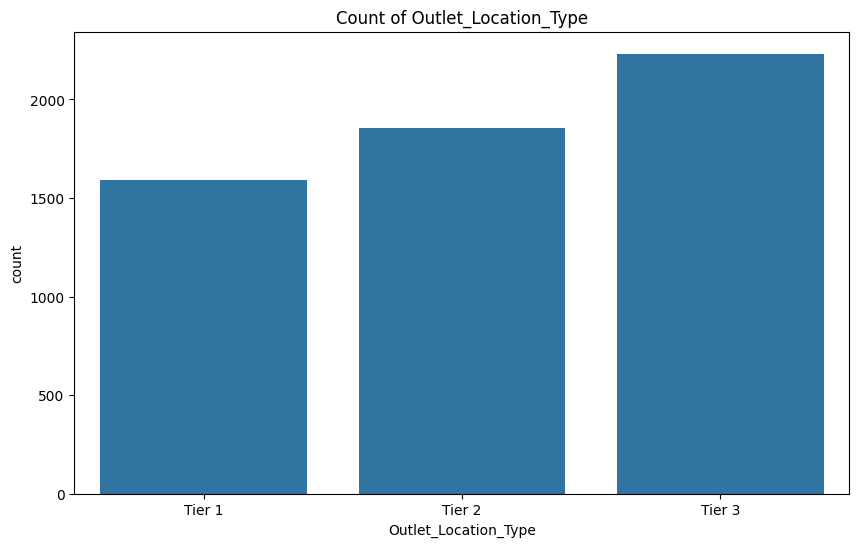



Count of Outlet_Type:
Outlet_Type
Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: count, dtype: int64


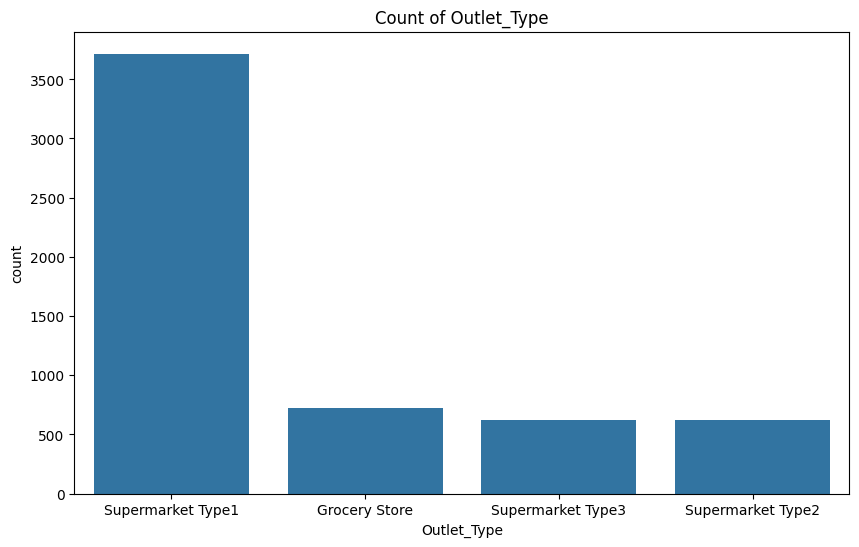

In [11]:
# Count Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns

for feature in categorical_features:
    print(f"Count of {feature}:")
    print(data[feature].value_counts())
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Count of {feature}")
    plt.show()
    print("\n")

In [12]:
# Please check for inconsistent values (item_fat_contants)
if 'item_fat_contants' in data.columns:
    num_unique_values = data['item_fat_contants'].nunique()
    print(f"Number of unique values in item_fat_contants: {num_unique_values}")
else:
    print("The column 'item_fat_contants' does not exist in the DataFrame.")

The column 'item_fat_contants' does not exist in the DataFrame.


## Data Cleaning and Processing

In [13]:
# Handling Missing Values
if 'Item_Weight' in data.columns:
    data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True) # Check the use of inplace parameter
else:
    print("The column 'item_Weight' does not exist in the DataFrame")
# Handling inconsistent values
if 'Item_Fat_Content' in data.columns:
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat' }, inplace=True) # Fill rest of the dictionary values
else:
    print("The column 'Item_Fat_Content' does not exist in the DataFrame")
# Transform features (outlet_age)
if 'Outlet_Establishment_Year' in data.columns:
    data['outlet_age'] = 2024 - data['Outlet_Establishment_Year']
else:
    print("The column 'Outlet_Establishment_Year' does not exist in the DataFrame.")

C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_15720\1910197769.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True) # Check the use of inplace parameter
C:\Users\D MADHAN MOHAN\AppData\Local\Temp\ipykernel_15720\1910197769.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermed

## Bivariant Analysis

In [21]:
# Relationship between numerical features and target values

sns.scatterplot(data=data, x='Item_Weight', y = 'Item_Outlet_Sales')
plt.show()

# Continue ploting for rest of the features
#................................................................





ValueError: Could not interpret value `Item_Outlet_Sales` for `y`. An entry with this name does not appear in `data`.

In [ ]:
# Relationship between categorical features and target features
sns.boxplot(data=data, x = 'item_fat_content', y = 'item_outlet_sales')
plt.show()


# .... Continue


##  multivariant Analysis

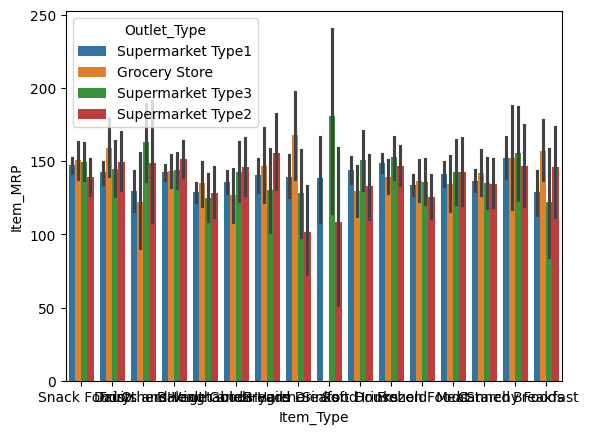

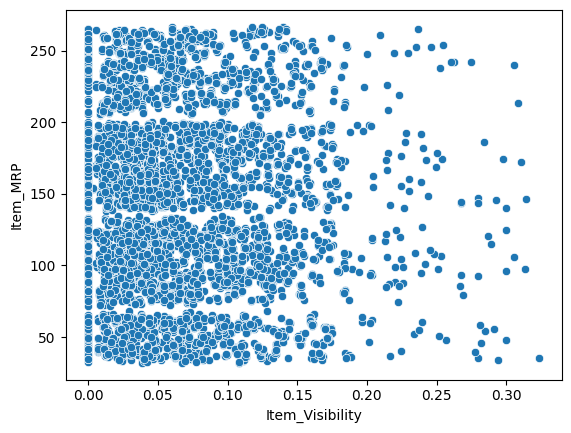

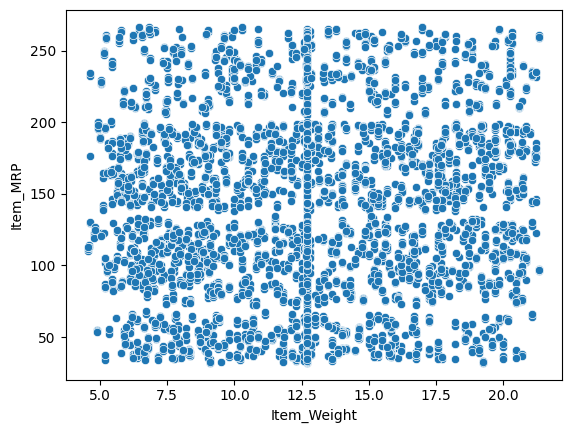

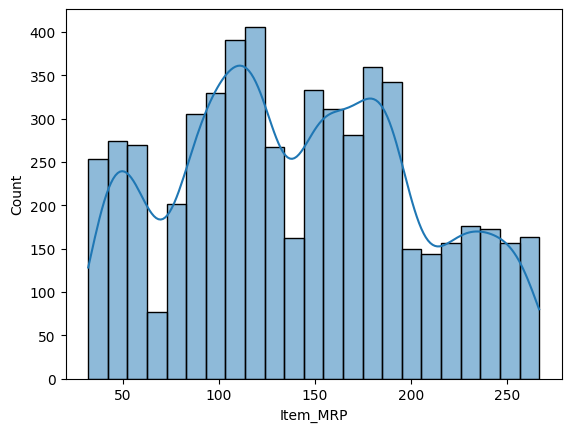

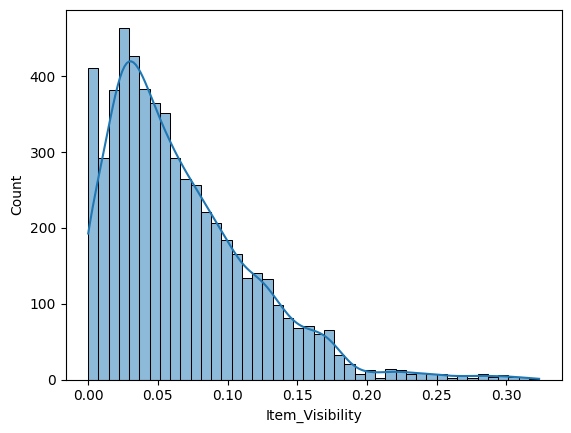

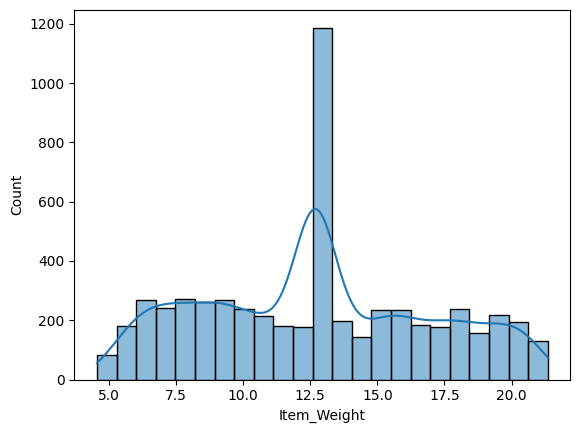

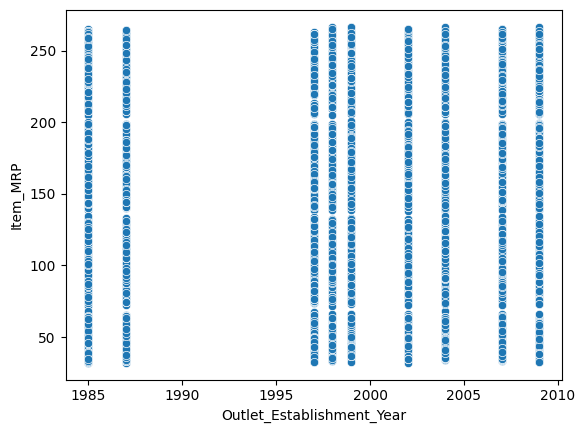

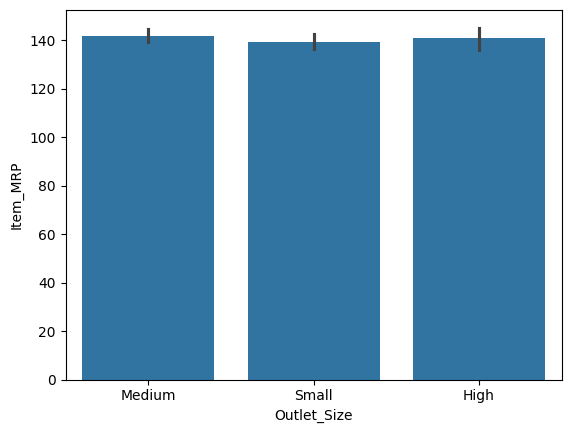

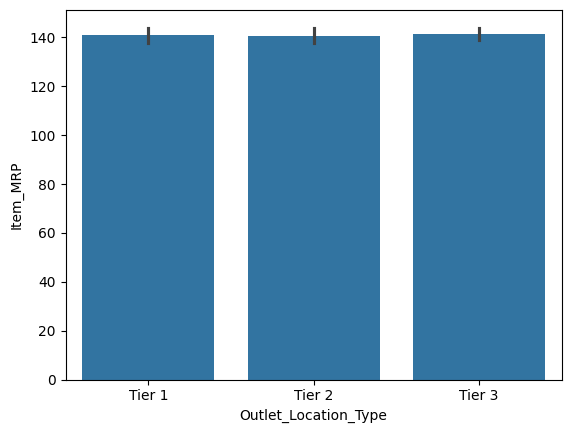

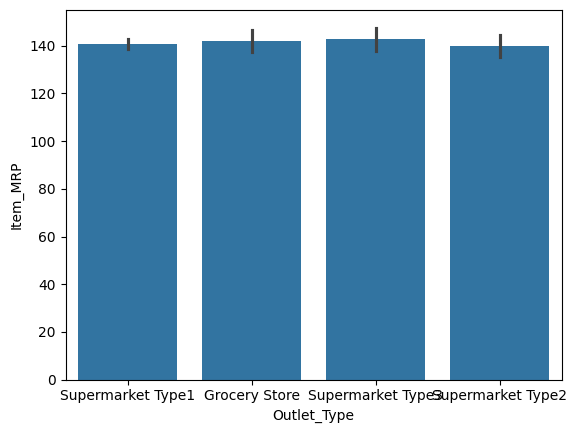

In [22]:
# Interaction between features
sns.barplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
plt.show()

# Relationship between Item Visibility and Item MRP
sns.scatterplot(data=data, x='Item_Visibility', y='Item_MRP')
plt.show()

# Relationship between Item Weight and Item MRP
sns.scatterplot(data=data, x='Item_Weight', y='Item_MRP')
plt.show()

# Distribution of Item MRP
sns.histplot(data=data, x='Item_MRP', kde=True)
plt.show()

# Distribution of Item Visibility
sns.histplot(data=data, x='Item_Visibility', kde=True)
plt.show()

# Distribution of Item Weight
sns.histplot(data=data, x='Item_Weight', kde=True)
plt.show()

# Relationship between Outlet Establishment Year and Item MRP
sns.scatterplot(data=data, x='Outlet_Establishment_Year', y='Item_MRP')
plt.show()

# Relationship between Outlet Size and Item MRP
sns.barplot(data=data, x='Outlet_Size', y='Item_MRP')
plt.show()

# Relationship between Outlet Location Type and Item MRP
sns.barplot(data=data, x='Outlet_Location_Type', y='Item_MRP')
plt.show()

# Relationship between Outlet Type and Item MRP
sns.barplot(data=data, x='Outlet_Type', y='Item_MRP')
plt.show()

# Outlier Detection

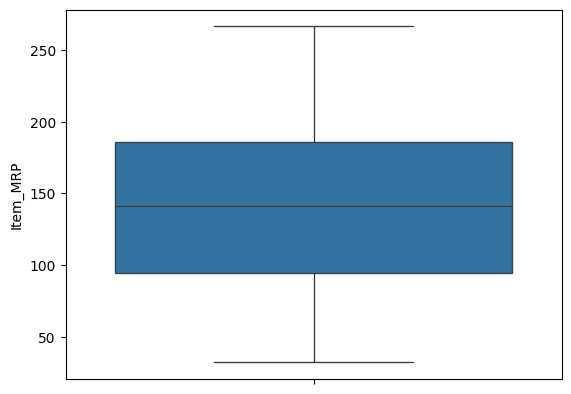

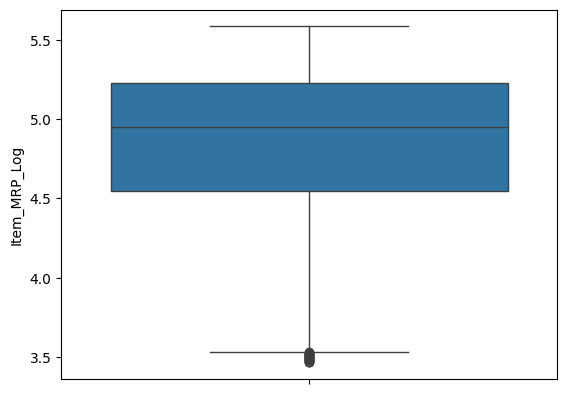

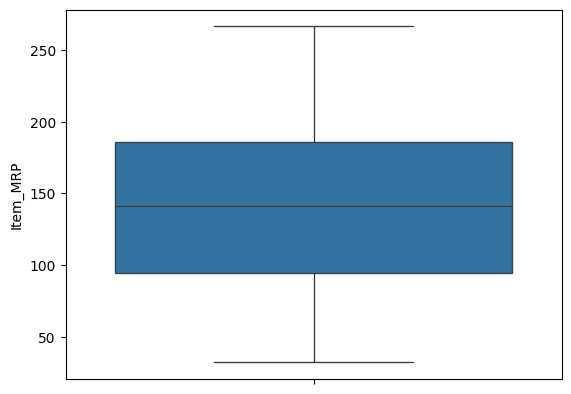

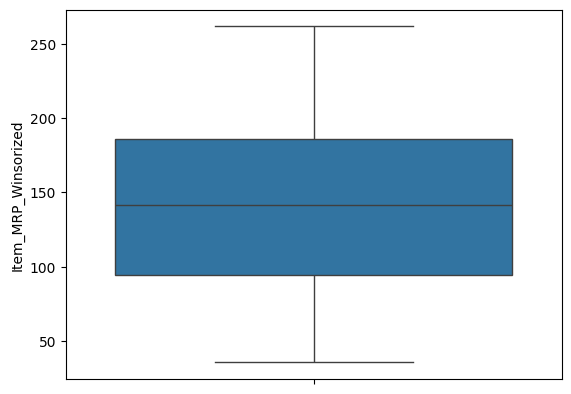

In [23]:
# Box plot to visualize the distribution of Item MRP
sns.boxplot(data['Item_MRP'])
plt.show()

# Handling outliers
# Can transform, remove, cap the outlier

# Method 1: Transforming outliers using logarithmic transformation
data['Item_MRP_Log'] = np.log(data['Item_MRP'])
sns.boxplot(data['Item_MRP_Log'])
plt.show()

# Method 2: Removing outliers using IQR method
Q1 = data['Item_MRP'].quantile(0.25)
Q3 = data['Item_MRP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_filtered = data[(data['Item_MRP'] > lower_bound) & (data['Item_MRP'] < upper_bound)]
sns.boxplot(data_filtered['Item_MRP'])
plt.show()

# Method 3: Capping outliers using winsorization method
from scipy.stats import mstats
data['Item_MRP_Winsorized'] = mstats.winsorize(data['Item_MRP'], limits=[0.01, 0.01])
sns.boxplot(data['Item_MRP_Winsorized'])
plt.show()

## Feature Engineering

In [31]:
print(data.columns)

# New feature for price range
data['Price_Range'] = pd.qcut(data['Item_MRP'], q=5, labels=['Low', 'Medium', 'High', 'Very High', 'Extremely High'])

# Create dummies for categorical variables
categorical_cols = ['Item_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Price_Range']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'outlet_age', 'Item_MRP_Log', 'Item_MRP_Winsorized', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Price_Range_Medium', 'Price_Range_High', 'Price_Range_Very High',
       'Price_Range_Extremely High', 'Price_Range'],
      dtype='object')


KeyError: "['Item_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type'] not in index"

## Visualizations


In [ ]:
## Correlation plot
corr = data.corr()
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

# Time series analysis


## Reporting

In [ ]:
# Summarize your findings. Do not use code snipets. Please write at least 2 lines about each feature.



## Fitting a model (Linear Regression)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm 



In [8]:
x = data[['Item_Weight','Item_Mrp','Outlet_Size']]
Y = data['Outlet_Values']


KeyError: "['Item_Mrp'] not in index"

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=46)

In [ ]:
# Scaling features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)


In [ ]:
# Fitting the linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

In [ ]:
# Predict on the test set
y_pred = mode.predict(x_test_scaled)

In [ ]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print these values (MSE and R-Squared values)

In [ ]:
# Checking assumptions


# Assumption 1: Linearity
sns.scatterplot(x = y_test, y = y_pred)
plt.xlable('actual sales ')
plt.ylable('predited sales ')
plt.title ('actual vs prdeicted sales')
plt.show()

# Assumption  2 : Normaity of residuals
residuals = _test - y_pred
sns.histplot(residuals, kde = Ture)
plt.title('Residuals distribution')
plt.show()

# Assumption 3 : Homoscedasticity
sns.scatterplot(x = y_pred, y = residuals)
plt.xlabel('Predicted sales')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()



# Assumption 4: INdependence of residuals
# durbin_watson test


# Assumption 5: No multicollinearitty among predictors
vif_data = pd.DataFrame()
vif_data['features' ] = x_train.columns
vif_data['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(len(x_train.columns))]
vif_data